In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2, os

In [2]:
!which python

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/bin/python


In [3]:
%cd ..

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/HeartReconstruction


/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [22]:
def read_video(video_path):
    """ 
    """
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if not ret:
            break
        frames.append(frame)
    cap.release()

    return frames

## Подгрузим видео и нанесём маску

In [7]:
main_path = 'data/raw/EchoNet-Dynamic'

label_df = pd.read_csv(os.path.join(main_path, 'VolumeTracings.csv'))
label_df

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46
...,...,...,...,...,...,...
425005,0XFEBEEFF93F6FEB9.avi,45.419984,55.131136,69.758942,57.498739,38
425006,0XFEBEEFF93F6FEB9.avi,45.017994,57.543075,69.399107,59.914779,38
425007,0XFEBEEFF93F6FEB9.avi,44.616005,59.955014,69.039271,62.330818,38
425008,0XFEBEEFF93F6FEB9.avi,44.214015,62.366952,68.712853,64.750108,38


In [11]:
# Sorted by name and frame
label_df = label_df.sort_values(['FileName', 'Frame'])
label_df.head(10)

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46
5,0X100009310A3BD7FC.avi,47.962105,29.759513,65.810920,25.221679,46
6,0X100009310A3BD7FC.avi,48.167915,32.723188,68.247043,27.618326,46
7,0X100009310A3BD7FC.avi,48.373726,35.686864,70.385311,30.090698,46
8,0X100009310A3BD7FC.avi,48.579537,38.650539,72.523579,32.563071,46
9,0X100009310A3BD7FC.avi,49.014039,41.556073,74.151644,35.165156,46


Странно, но тут походу не все фреймы у видео

In [14]:
label_df[label_df['FileName'] == '0X100009310A3BD7FC.avi']

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46
5,0X100009310A3BD7FC.avi,47.962105,29.759513,65.810920,25.221679,46
6,0X100009310A3BD7FC.avi,48.167915,32.723188,68.247043,27.618326,46
7,0X100009310A3BD7FC.avi,48.373726,35.686864,70.385311,30.090698,46
8,0X100009310A3BD7FC.avi,48.579537,38.650539,72.523579,32.563071,46
9,0X100009310A3BD7FC.avi,49.014039,41.556073,74.151644,35.165156,46


In [25]:
label_df.Frame.min(), label_df.Frame.max()

(np.int64(0), np.int64(686))

In [23]:
video = read_video(os.path.join(main_path, 'Videos', '0X100009310A3BD7FC.avi'))
len(video)

174

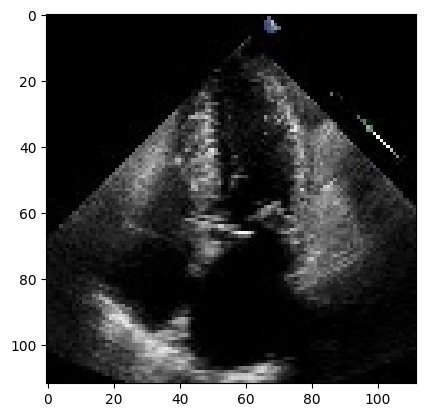

In [26]:
plt.imshow(video[61]);

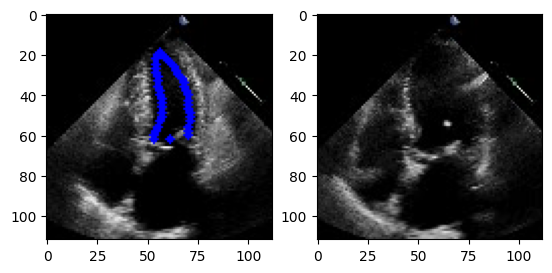

In [46]:
frame = video[61].copy()

kpoints = label_df[(label_df['FileName'] == '0X100009310A3BD7FC.avi') & (label_df['Frame'] == 61)]
kpoints = np.concat([kpoints[['X1', 'Y1']], kpoints[['X2', 'Y2']]], axis=0)

for i, points in enumerate(kpoints):
    x = int(points[0])
    y = int(points[1])
    
    cv2.circle(frame, (x, y), 2, (0, 0, 255), -1)   # 

plt.subplot(121)
plt.imshow(frame);
plt.subplot(122)
plt.imshow(video[1]);

In [47]:
import json

## Mini Version of DS

{'LV': [[34, 52], [33, 53], [32, 53], [31, 53], [30, 53], [29, 54], [28, 54], [27, 54], [26, 55], [25, 55], [24, 56], [23, 57], [22, 57], [21, 58], [20, 59], [19, 60], [18, 61], [17, 62], [16, 63], [16, 64], [16, 65], [16, 66], [16, 67], [16, 68], [16, 69], [16, 70], [16, 71], [16, 72], [16, 73], [17, 74], [17, 75], [17, 76], [18, 77], [18, 78], [19, 79], [20, 80], [21, 81], [22, 81], [23, 82], [24, 83], [25, 84], [26, 85], [27, 86], [28, 87], [29, 87], [30, 88], [31, 88], [32, 88], [33, 89], [34, 89], [35, 90], [36, 90], [37, 91], [38, 92], [39, 93], [40, 93], [41, 94], [42, 95], [43, 95], [44, 96], [45, 96], [46, 96], [47, 97], [48, 97], [49, 97], [50, 98], [51, 98], [52, 99], [53, 99], [54, 99], [55, 99], [56, 99], [57, 99], [58, 99], [59, 100], [60, 100], [61, 100], [62, 100], [63, 99], [64, 99], [65, 99], [66, 99], [67, 99], [68, 99], [69, 99], [70, 99], [71, 99], [72, 98], [73, 98], [74, 98], [75, 98], [76, 98], [77, 98], [78, 98], [79, 98], [80, 97], [81, 97], [82, 97], [83, 96]

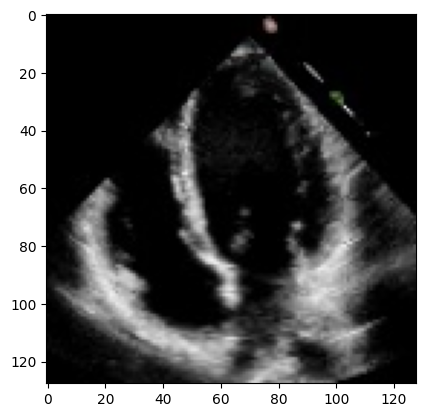

In [57]:
path = 'data/raw/Mini-EchoNet-Dynamic'

img = cv2.imread(os.path.join(path, 'Images', 'frame_1.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with open(os.path.join(path, 'MasksJsonContours', 'mascara1.json')) as f:
    lbl = json.load(f)
    print(lbl)

plt.imshow(img)

In [53]:
lbl.keys()

dict_keys(['LV', 'LA', 'RV', 'RA'])

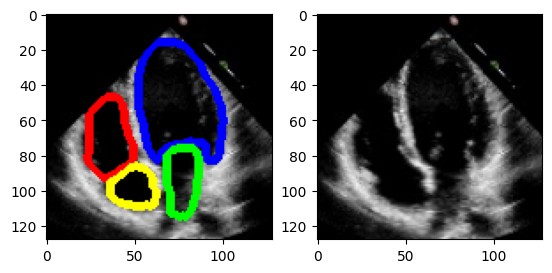

In [60]:
new_img = img.copy()

for key, vals in lbl.items():
    if key == "LV":
        color = (0, 0, 255)
    elif key == "LA":
        color = (0, 255, 0)
    elif key == "RV":
        color = (255, 0, 0)
    else:
        color = (255, 255, 0)
    for val in vals:
        x, y = val[1], val[0]
        cv2.circle(new_img, (x, y), 2, color, -1)

plt.subplot(121)
plt.imshow(new_img);
plt.subplot(122)
plt.imshow(img);